In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

## Plotear Predicciones

In [3]:
df_vols_trabajo_semanal = pd.read_excel('./dataframes/df_vols_trabajo_semanal.xlsx')
y_real = pd.read_excel('./predictions/y_real.xlsx')
y_pred_exp = pd.read_excel('./predictions/y_pred_exp.xlsx')
y_pred_sarima = pd.read_excel('./predictions/y_pred_sarima.xlsx')
y_pred_prophet = pd.read_excel('./predictions/y_pred_prophet.xlsx')
y_pred_XGBoost = pd.read_excel('./predictions/y_pred_XGBoost.xlsx')
y_pred_lstm = pd.read_excel('./predictions/y_pred_lstm.xlsx')

In [4]:
df_vols_trabajo_semanal = df_vols_trabajo_semanal[['semana_primer_dia', 'tiempo_trabajo_horas']].rename(columns={'semana_primer_dia': 'ds', 'tiempo_trabajo_horas': 'y'})

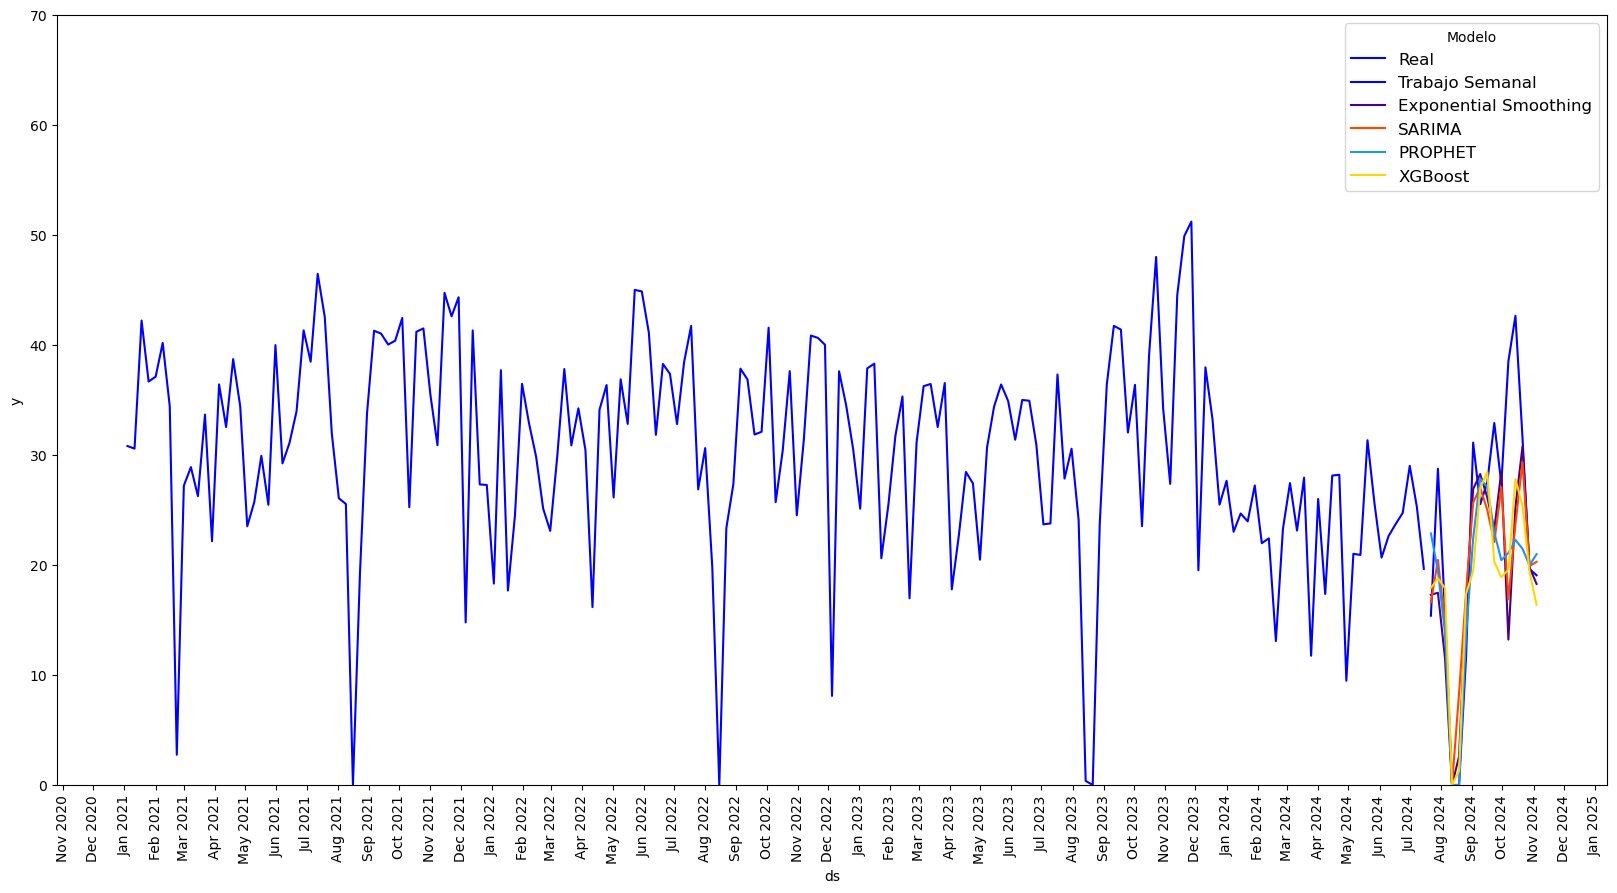

In [23]:
import matplotlib.dates as mdates
#Trabajo Semanal en cantidad de productos 
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
ax.set_ylim(0,70)
plt.xticks(rotation=90)
sns.lineplot(data=y_real, x='ds', y='y', color='blue', label='Real')  # Negro para la línea real
sns.lineplot(data=df_vols_trabajo_semanal, x='ds', y='y', color='blue', label='Trabajo Semanal')  # Azul brillante
sns.lineplot(data=y_pred_exp, x='ds', y='yhat', color='#4B0082', label='Exponential Smoothing')  # Indigo vibrante
sns.lineplot(data=y_pred_sarima, x='ds', y='yhat', color='#FF4500', label='SARIMA')  # Naranja rojizo
sns.lineplot(data=y_pred_prophet, x='ds', y='yhat', color='#1E90FF', label='PROPHET')  # Verde lima
sns.lineplot(data=y_pred_XGBoost, x='ds', y='yhat', color='#FFD700', label='XGBoost')  # Amarillo dorado
# sns.lineplot(data=y_pred_lstm, x='ds', y='yhat', color='#FF69B4', label='LSTM')  # Rosa vibrante

plt.legend(title="Modelo", loc='upper right', fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator())  # Ubicar las etiquetas en cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Mostrar solo el nombre del mes

# # Guardar la figura como archivo antes de mostrarla
output_file = "grafico_serie_total.png"  # Cambia el nombre si lo necesitas
plt.savefig(output_file, dpi=300, bbox_inches='tight')  # DPI alto para buena calidad

plt.show()

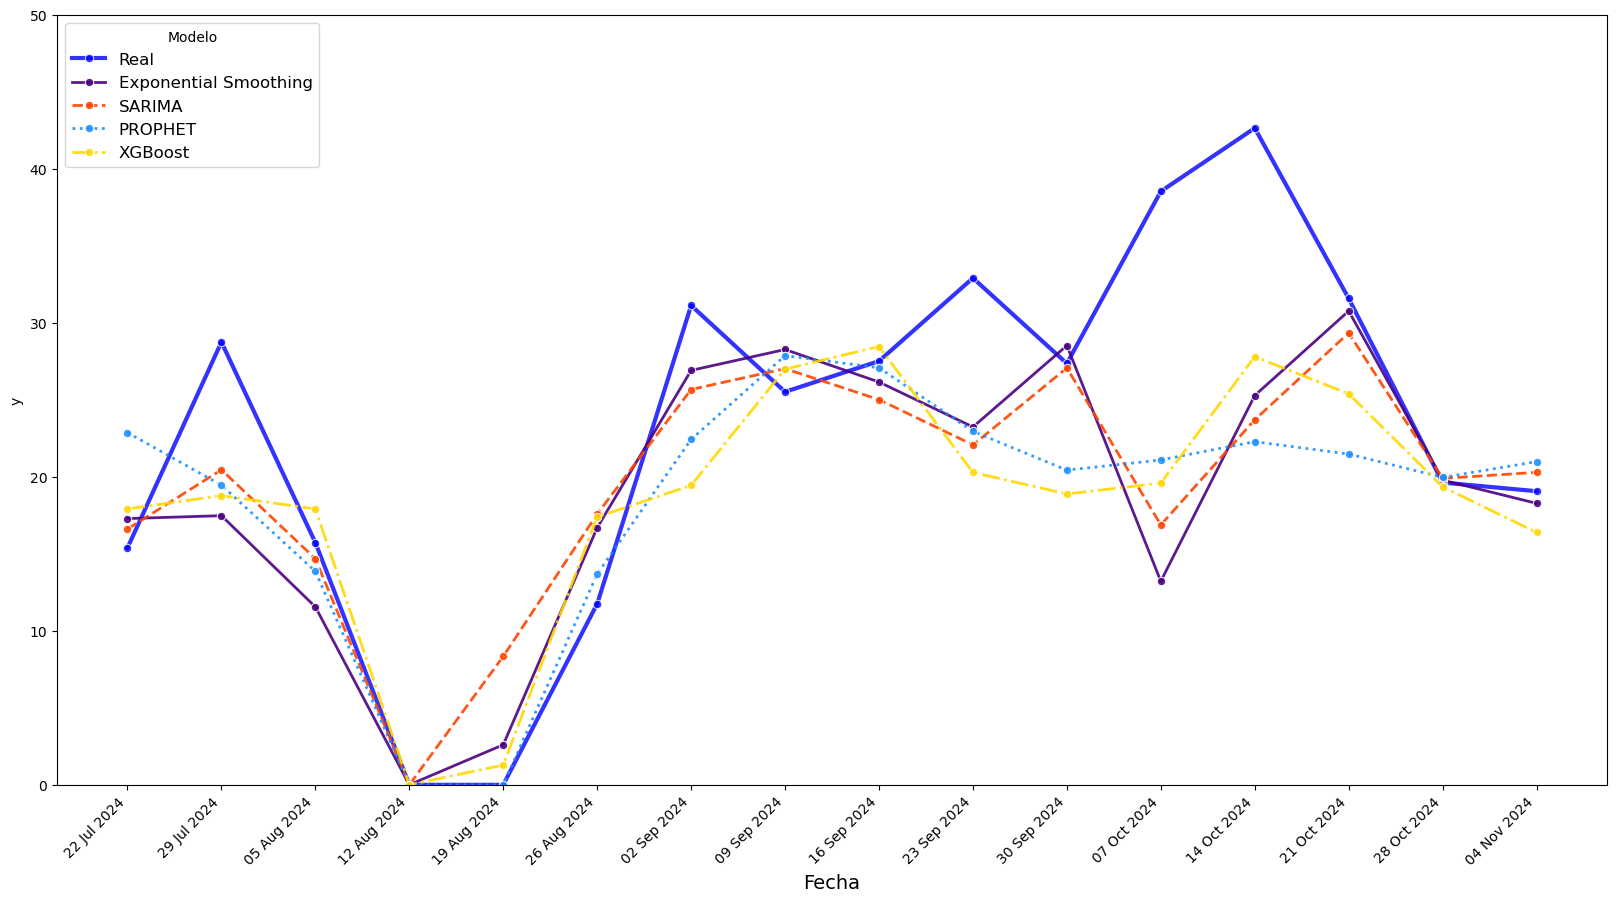

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Trabajo Semanal en cantidad de productos
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
ax.set_ylim(0, 50)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas y alinear a la derecha para mejor legibilidad

# Líneas de predicción con diferentes estilos
sns.lineplot(data=y_real, x='ds', y='y', color='blue', label='Real', linewidth=3, marker='o', markersize=6, alpha=0.8)  # Negro para la línea real
sns.lineplot(data=y_pred_exp, x='ds', y='yhat', color='#4B0082', label='Exponential Smoothing', linestyle='-', linewidth=2, marker='o', markersize=6, alpha=0.9)  # Indigo vibrante
sns.lineplot(data=y_pred_sarima, x='ds', y='yhat', color='#FF4500', label='SARIMA', linestyle='--', linewidth=2, marker='o', markersize=6, alpha=0.9)  # Naranja rojizo
sns.lineplot(data=y_pred_prophet, x='ds', y='yhat', color='#1E90FF', label='PROPHET', linestyle=':', linewidth=2, marker='o', markersize=6, alpha=0.9)  # Azul brillante
sns.lineplot(data=y_pred_XGBoost, x='ds', y='yhat', color='#FFD700', label='XGBoost', linestyle='-.', linewidth=2, marker='o', markersize=6, alpha=0.9)  # Amarillo dorado
# sns.lineplot(data=y_pred_lstm, x='ds', y='yhat', color='#32CD32', label='LSTM', linestyle='-', linewidth=2, marker='o', markersize=6, alpha=0.9)  # Verde lima

# Ajustes del eje X para mostrar todas las semanas
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))  # MO representa lunes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))  # Formato día, mes y año

plt.xlabel("Fecha", fontsize=14)

# Ajustar la leyenda
plt.legend(title="Modelo", loc='upper left', fontsize=12)

# Guardar la figura como archivo antes de mostrarla
output_file = "grafico_trabajo_semanal.png"  # Cambia el nombre si lo necesitas
plt.savefig(output_file, dpi=300, bbox_inches='tight')  # DPI alto para buena calidad

plt.show()


## Calcular métricas finales de error semana a semana

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [8]:
# y_real 
# y_pred_exp 
# y_pred_sarima 
# y_pred_prophet 
# y_pred_XGBoost 


In [9]:
resultados_lista = []

for semana in range(1,17):
    resultados = {
    "semana": semana,
    "RMSE_Exponetial_Smoothing": mean_squared_error(y_real['y'][:semana], y_pred_exp['yhat'][:semana]) ** (1/2),
    "RMSE_SARIMA": mean_squared_error(y_real['y'][:semana], y_pred_sarima ['yhat'][:semana]) ** (1/2),
    "RMSE_PROPHET": mean_squared_error(y_real['y'][:semana], y_pred_prophet ['yhat'][:semana]) ** (1/2),
    "RMSE_XGBoost": mean_squared_error(y_real['y'][:semana], y_pred_XGBoost ['yhat'][:semana]) ** (1/2),

    "MAE_Exponetial_Smoothing": mean_absolute_error(y_real['y'][:semana], y_pred_exp['yhat'][:semana]),
    "MAE_SARIMA": mean_absolute_error(y_real['y'][:semana], y_pred_sarima ['yhat'][:semana]),
    "MAE_PROPHET": mean_absolute_error(y_real['y'][:semana], y_pred_prophet ['yhat'][:semana]),
    "MAE_XGBoost": mean_absolute_error(y_real['y'][:semana], y_pred_XGBoost ['yhat'][:semana])    
    }
    resultados_lista.append(resultados)

errores = pd.DataFrame(resultados_lista)

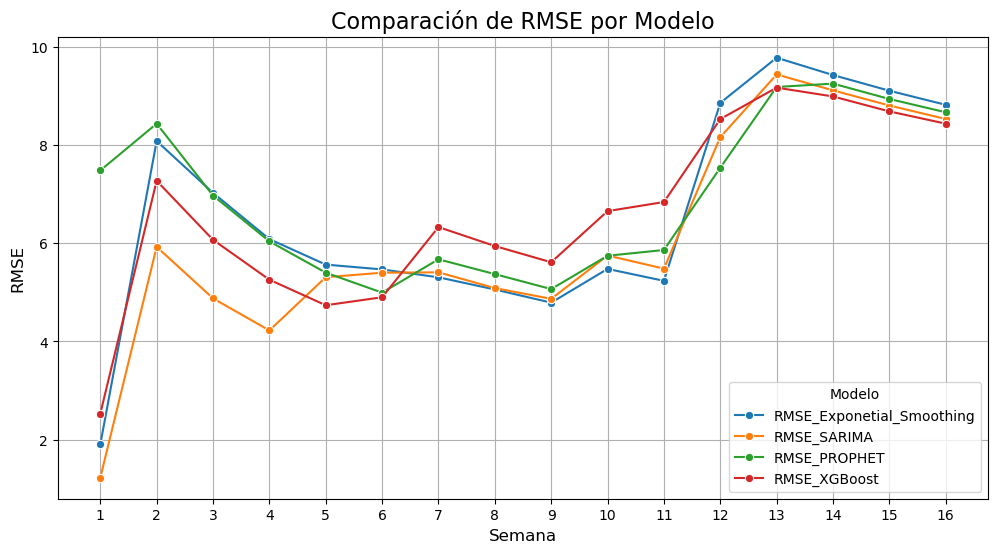

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir el DataFrame a formato largo para Seaborn
df_long = errores.melt(id_vars="semana", 
                            value_vars=["RMSE_Exponetial_Smoothing", "RMSE_SARIMA", "RMSE_PROPHET", "RMSE_XGBoost"], 
                            var_name="Modelo", 
                            value_name="RMSE")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x="semana", y="RMSE", hue="Modelo", marker="o")

# Ajustar el rango del eje X para que comience en 1
plt.xticks(ticks=range(1, errores['semana'].max() + 1))  # Asegurar que incluya todas las semanas

# Configurar el título y etiquetas
plt.title("Comparación de RMSE por Modelo", fontsize=16)
plt.xlabel("Semana", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.legend(title="Modelo", fontsize=10)
plt.grid(True)

# Mostrar el gráfico
plt.show()


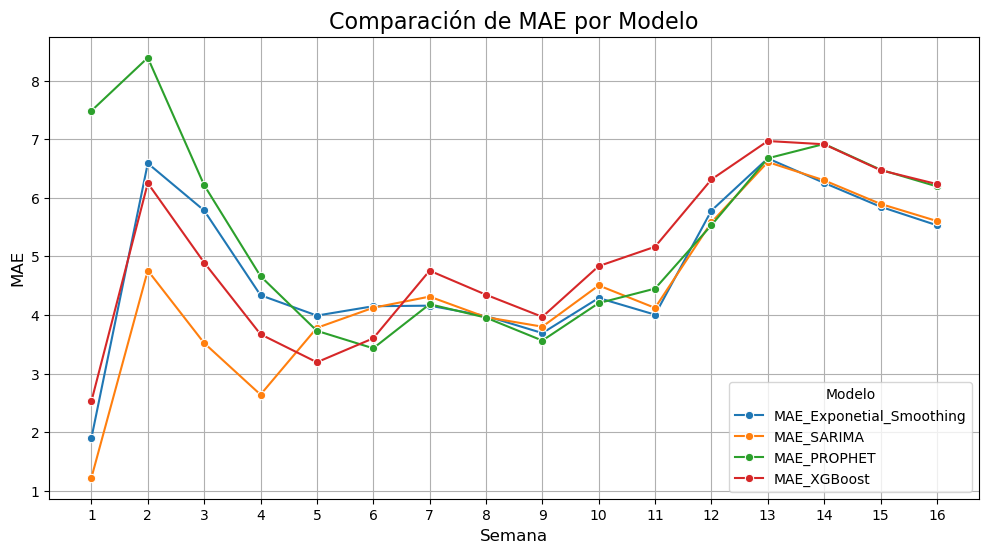

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir el DataFrame a formato largo para Seaborn
df_long = errores.melt(id_vars="semana", 
                            value_vars=["MAE_Exponetial_Smoothing", "MAE_SARIMA", "MAE_PROPHET", "MAE_XGBoost"], 
                            var_name="Modelo", 
                            value_name="MAE")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x="semana", y="MAE", hue="Modelo", marker="o")

# Ajustar el rango del eje X para que comience en 1
plt.xticks(ticks=range(1, errores['semana'].max() + 1))  # Asegurar que incluya todas las semanas

# Configurar el título y etiquetas
plt.title("Comparación de MAE por Modelo", fontsize=16)
plt.xlabel("Semana", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.legend(title="Modelo", fontsize=10)
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [17]:
# Crear un diccionario con las métricas para cada modelo
results = {
    "Modelo": ["Exponential_Smoothing", "SARIMA", "PROPHET", "XGBoost"],
    "RMSE": [
        mean_squared_error(y_real['y'], y_pred_exp['yhat'], squared=False),
        mean_squared_error(y_real['y'], y_pred_sarima['yhat'], squared=False),
        mean_squared_error(y_real['y'], y_pred_prophet['yhat'], squared=False),
        mean_squared_error(y_real['y'], y_pred_XGBoost['yhat'], squared=False)
    ],
    "MAE": [
        mean_absolute_error(y_real['y'], y_pred_exp['yhat']),
        mean_absolute_error(y_real['y'], y_pred_sarima['yhat']),
        mean_absolute_error(y_real['y'], y_pred_prophet['yhat']),
        mean_absolute_error(y_real['y'], y_pred_XGBoost['yhat'])
    ]
}

# Crear el DataFrame con los resultados
df_results = pd.DataFrame(results)

# Mostrar el DataFrame
print("Metricas de error a 16 semanas")
df_results

Metricas de error a 16 semanas


Modelo      RMSE       MAE
0  Exponential_Smoothing  8.821956  5.531059
1                 SARIMA  8.533564  5.603246
2                PROPHET  8.670116  6.194144
3                XGBoost  8.438451  6.233558

In [18]:
# Crear un diccionario con las métricas para los primeros 8 valores
results = {
    "Modelo": ["Exponential_Smoothing", "SARIMA", "PROPHET", "XGBoost"],
    "RMSE": [
        mean_squared_error(y_real['y'][:8], y_pred_exp['yhat'][:8], squared=False),
        mean_squared_error(y_real['y'][:8], y_pred_sarima['yhat'][:8], squared=False),
        mean_squared_error(y_real['y'][:8], y_pred_prophet['yhat'][:8], squared=False),
        mean_squared_error(y_real['y'][:8], y_pred_XGBoost['yhat'][:8], squared=False)
    ],
    "MAE": [
        mean_absolute_error(y_real['y'][:8], y_pred_exp['yhat'][:8]),
        mean_absolute_error(y_real['y'][:8], y_pred_sarima['yhat'][:8]),
        mean_absolute_error(y_real['y'][:8], y_pred_prophet['yhat'][:8]),
        mean_absolute_error(y_real['y'][:8], y_pred_XGBoost['yhat'][:8])
    ]
}

# Crear el DataFrame con los resultados
df_results = pd.DataFrame(results)

# Mostrar el DataFrame
print("Metricas de error a 8 semanas")
df_results


Metricas de error a 8 semanas


Modelo      RMSE       MAE
0  Exponential_Smoothing  5.058596  3.982685
1                 SARIMA  5.087112  3.962567
2                PROPHET  5.372109  3.954585
3                XGBoost  5.944784  4.345372